In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#nashville hospitals, fil
query = """
SELECT n.location_address_city_name AS city, 
       n.location_address_state_name AS state,
       n.location_address_postal_code AS zipcode,
       organization_name AS display_name,
       
       t.classification
FROM npidata n

LEFT JOIN taxonomy t
USING(taxonomy_code)

WHERE entity_type_code = 2
AND location_address_city_name = 'NASHVILLE'
AND display_name = 'General Acute Care Hospital'
AND location_address_state_name = 'TN'
"""
with sqlite3.connect('data/hop_db.sqlite') as db:
    nash_hosp = pd.read_sql(query, db)

db.close()

In [5]:
nash_hosp

,city,state,zipcode,display_name,classification
0,NASHVILLE,TN,37219,"BUCKS COUNTY ONCOPLASTIC INSTITUTE, LLC",General Acute Care Hospital
1,NASHVILLE,TN,37236,SETON CORPORATION,General Acute Care Hospital
2,NASHVILLE,TN,37232,VANDERBILT UNIVERSITY MEDICAL CENTER,General Acute Care Hospital
3,NASHVILLE,TN,37205,"ST. THOMAS NP, LLC",General Acute Care Hospital
4,NASHVILLE,TN,37232,VANDERBILT UNIVERSITY MEDICAL CENTER,General Acute Care Hospital
5,NASHVILLE,TN,37206,NASHVILLE REHAB LLC,General Acute Care Hospital
6,NASHVILLE,TN,37232,VANDERBILT UNIVERSITY MEDICAL CENTER,General Acute Care Hospital
7,NASHVILLE,TN,37208,MEHARRY MEDICAL COLLEGE,General Acute Care Hospital
8,NASHVILLE,TN,37236,BAPTIST HOSPITAL SYSTEMS INC,General Acute Care Hospital
9,NASHVILLE,TN,37232,VANDERBILT MEDICAL CENTER,General Acute Care Hospital


In [6]:
#Providers doing referrals to nashville hospitals

query = """ 
WITH nash_hosps AS (SELECT npi, display_name
            FROM npidata n
            LEFT JOIN taxonomy t
            USING(taxonomy_code)
            WHERE entity_type_code = 2
                AND n.location_address_city_name = 'NASHVILLE'
                AND n.location_address_state_name = 'TN'
                AND t.display_name = 'General Acute Care Hospital')



SELECT h.from_npi AS referring_npi, 
        h.to_npi AS referred_to_npi
        
FROM hop h
WHERE to_npi IN (SELECT npi FROM nash_hosps);
"""

with sqlite3.connect('data/hop_db.sqlite') as db:
    referring_provs = pd.read_sql(query, db)

db.close()

In [7]:
referring_provs['referring_npi'].value_counts()

1093741464    11
1245393057    11
1861478489    11
1043297542    11
1104202761    11
              ..
1740221878     1
1700996535     1
1003802042     1
1306394044     1
1104062959     1
Name: referring_npi, Length: 5274, dtype: int64

In [19]:
referring_provs['referring_npi'].nunique()

5274

There are 5,274 npi's that refer to nashville hospitals.

In [8]:
referring_provs

,referring_npi,referred_to_npi
0,1518115062,1023055126
1,1518078039,1023055126
2,1518122613,1023055126
3,1518205897,1023055126
4,1518004373,1023055126
...,...,...
11743,1215257670,1992861314
11744,1215932413,1992861314
11745,1245393057,1992861314
11746,1265589139,1992861314


In [9]:
query = """
WITH nash_hosps AS (SELECT npi, display_name      
            FROM npidata n
            LEFT JOIN taxonomy t
            USING(taxonomy_code)
            WHERE entity_type_code = 2
                AND n.location_address_city_name= 'NASHVILLE'
                AND n.location_address_state_name = 'TN'
                AND t.display_name = 'General Acute Care Hospital')   --nash_hosps only

        
--building profile for the referring_provs         
SELECT 
        h.from_npi AS referring_npi, 
        t.display_name AS specialty,
        organization_name AS organization,
        n.location_address_city_name AS city,
        n.location_address_state_name AS state,
        n.location_address_postal_code AS zipcode


FROM hop h

INNER JOIN npidata n  --to find their npi info
ON h.from_npi = n.npi

INNER JOIN taxonomy t --to find their specialty
USING(taxonomy_code)

WHERE to_npi IN (SELECT npi FROM nash_hosps);

"""

with sqlite3.connect('data/hop_db.sqlite') as db:
    referring_prov_profs = pd.read_sql(query, db)

db.close()

In [10]:
referring_prov_profs

,referring_npi,specialty,organization,city,state,zipcode
0,1518115062,Nursing Facility/Intermediate Care Facility,HILLCREST HEALTHCARE LLC,ASHLAND CITY,TN,37015
1,1518078039,Podiatrist,None,FRANKLIN,TN,37067
2,1518122613,Clinical Cardiac Electrophysiology Physician,None,SARASOTA,FL,34239
3,1518205897,Cardiovascular Disease Physician,CARDIOVASCULAR INSTITUTE PC,SMYRNA,TN,37167
4,1518004373,Diagnostic Radiology Physician,None,WEST COVINA,CA,91790
...,...,...,...,...,...,...
11653,1215257670,Diagnostic Radiology Physician,None,GOODLETTSVILLE,TN,37072
11654,1215932413,Internal Medicine Physician,"ANESTHESIA MEDICAL GROUP, PC",NASHVILLE,TN,37203
11655,1245393057,Internal Medicine Physician,CENTENNIAL HEART LLC,NASHVILLE,TN,37203
11656,1265589139,Gynecologic Oncology Physician,None,NASHVILLE,TN,37203


In [ ]:
query = """
WITH nash_hosps AS (SELECT npi, display_name, organization_name AS hospital  
            FROM npidata n
            LEFT JOIN taxonomy t
            USING(taxonomy_code)
            WHERE entity_type_code = 2
                AND n.location_address_city_name LIKE '%Nashville%'
                AND n.location_address_state_name LIKE '%TN%'
                AND t.display_name = 'General Acute Care Hospital')   --nash_hosps only

--building profile for the referring_provs         
SELECT 
        h.from_npi AS referring_npi, 
        t.display_name AS referring_specialty,
        n.organization_name AS referring_organization,
        n.location_address_city_name AS referring_city,
        n.location_address_state_name AS referring_state,
        n.location_address_postal_code AS referring_zipcode,
        nash_hosps.npi AS referred_npi,
        nash_hosps.hospital AS referred_hospital

FROM hop h

INNER JOIN npidata n  --to find their npi info
ON h.from_npi = n.npi

LEFT JOIN taxonomy t --to find their specialty
USING(taxonomy_code)

INNER JOIN nash_hosps   --referred to hospitals
ON h.to_npi = nash_hosps.npi

WHERE 
    --h.to_npi IN (SELECT npi FROM nash_hosps)
    n.entity_type_code < 2
    AND h.average_day_wait < 50
    AND h.transaction_count >= 50;

"""

with sqlite3.connect('data/hop_db.sqlite') as db:
    refs_to_nash = pd.read_sql(query, db)

db.close()

In [66]:
refs_to_nash

,referring_npi,referring_specialty,referring_organization,referring_city,referring_state,referring_zipcode,referred_npi,referred_hospital
0,1518115062,Nursing Facility/Intermediate Care Facility,HILLCREST HEALTHCARE LLC,ASHLAND CITY,TN,37015,1023055126,"HCA HEALTH SERVICES OF TENNESSEE, INC."
1,1518014323,Internal Medicine Physician,None,NASHVILLE,TN,37203,1023055126,"HCA HEALTH SERVICES OF TENNESSEE, INC."
2,1508961996,Cardiovascular Disease Physician,None,CLARKSVILLE,TN,37043,1023055126,"HCA HEALTH SERVICES OF TENNESSEE, INC."
3,1518328756,Certified Registered Nurse Anesthetist,None,NASHVILLE,TN,37203,1023055126,"HCA HEALTH SERVICES OF TENNESSEE, INC."
4,1518382852,Skilled Nursing Facility,"LP NORTH NASHVILLE, LLC",NASHVILLE,TN,37218,1023055126,"HCA HEALTH SERVICES OF TENNESSEE, INC."
...,...,...,...,...,...,...,...,...
4028,1194758979,Emergency Medicine Physician,MIDDLE TENNESSEE EMERGENCY PHYSICIANS PC,NASHVILLE,TN,37236,1992861314,SETON CORPORATION
4029,1194751354,Medical Oncology Physician,None,NASHVILLE,TN,37203,1992861314,SETON CORPORATION
4030,1194743914,Medical Oncology Physician,None,NASHVILLE,TN,37203,1992861314,SETON CORPORATION
4031,1215932413,Internal Medicine Physician,"ANESTHESIA MEDICAL GROUP, PC",NASHVILLE,TN,37203,1992861314,SETON CORPORATION


### Are certain specialties more likely to refer to a particular hospital over the others?

In [13]:
refs_to_nash.groupby('referred_hospital')['referring_specialty'].value_counts()

referred_hospital                       referring_specialty                        
HCA HEALTH SERVICES OF TENNESSEE, INC.  Diagnostic Radiology Physician                 426
                                        Internal Medicine Physician                    351
                                        Emergency Medicine Physician                   228
                                        Family Medicine Physician                      205
                                        Certified Registered Nurse Anesthetist         151
                                                                                      ... 
VANDERBILT UNIVERSITY MEDICAL CENTER    Registered Nurse                                 1
                                        Retina Specialist (Ophthalmology) Physician      1
                                        Speech-Language Pathologist                      1
                                        Surgery Physician                                1
      

In [14]:
refs_to_nash.groupby('referring_specialty')['referred_hospital'].value_counts()

referring_specialty                       referred_hospital                     
Acute Care Clinical Nurse Specialist      HTI MEMORIAL HOSPITAL CORPORATION          1
Acute Care Nurse Practitioner             SAINT THOMAS WEST HOSPITAL                48
                                          HCA HEALTH SERVICES OF TENNESSEE, INC.    33
                                          HTI MEMORIAL HOSPITAL CORPORATION         10
                                          NASHVILLE GENERAL HOSPITAL                 1
                                                                                    ..
Women's Health Clinical Nurse Specialist  HCA HEALTH SERVICES OF TENNESSEE, INC.     1
                                          SAINT THOMAS WEST HOSPITAL                 1
Women's Health Nurse Practitioner         SAINT THOMAS WEST HOSPITAL                 7
                                          HCA HEALTH SERVICES OF TENNESSEE, INC.     6
                                          HTI MEM

In [15]:
refs_to_nash.referring_specialty.nunique()

230

In [31]:
#All referred to hospitals in Nashville
refs_to_nash.referred_hospital.unique()

array(['HCA HEALTH SERVICES OF TENNESSEE, INC.',
       'HTI MEMORIAL HOSPITAL CORPORATION',
       'VANDERBILT UNIVERSITY MEDICAL CENTER',
       'NASHVILLE GENERAL HOSPITAL', 'SAINT THOMAS WEST HOSPITAL',
       'SETON CORPORATION'], dtype=object)

In [32]:
table = refs_to_nash.groupby('referred_hospital')['referring_specialty'].value_counts()
table = pd.DataFrame(table)
table = table.rename(columns ={'referring_specialty' :'Count'})

table.reset_index(inplace = True)
table

,referred_hospital,referring_specialty,Count
0,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Diagnostic Radiology Physician,426
1,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Internal Medicine Physician,351
2,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Emergency Medicine Physician,228
3,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Family Medicine Physician,205
4,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Certified Registered Nurse Anesthetist,151
...,...,...,...
699,VANDERBILT UNIVERSITY MEDICAL CENTER,Registered Nurse,1
700,VANDERBILT UNIVERSITY MEDICAL CENTER,Retina Specialist (Ophthalmology) Physician,1
701,VANDERBILT UNIVERSITY MEDICAL CENTER,Speech-Language Pathologist,1
702,VANDERBILT UNIVERSITY MEDICAL CENTER,Surgery Physician,1


In [34]:
table.groupby('referred_hospital')['Count'].sum()

referred_hospital
HCA HEALTH SERVICES OF TENNESSEE, INC.    4314
HTI MEMORIAL HOSPITAL CORPORATION         1431
NASHVILLE GENERAL HOSPITAL                 185
SAINT THOMAS WEST HOSPITAL                5447
SETON CORPORATION                           41
VANDERBILT UNIVERSITY MEDICAL CENTER       240
Name: Count, dtype: int64

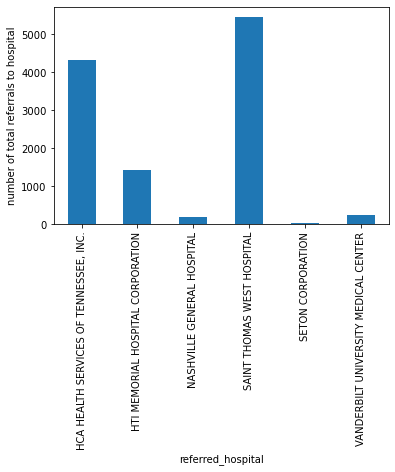

In [39]:
ax = table.groupby('referred_hospital')['Count'].sum().plot(kind = 'bar', ylabel = 'number of total referrals to hospital')

--St.Thomas Hospital has the  most count of referrals (sum of all referrals from all specialties), followed by HCA.

In [35]:
table.groupby('referred_hospital')['referring_specialty'].nunique()

referred_hospital
HCA HEALTH SERVICES OF TENNESSEE, INC.    206
HTI MEMORIAL HOSPITAL CORPORATION         150
NASHVILLE GENERAL HOSPITAL                 62
SAINT THOMAS WEST HOSPITAL                199
SETON CORPORATION                          21
VANDERBILT UNIVERSITY MEDICAL CENTER       66
Name: referring_specialty, dtype: int64

--HCA has the most number of specialties referring to it (206), followed by St. Thomas.

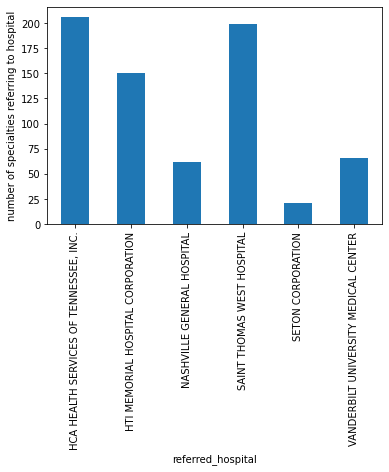

In [38]:
ax = table.groupby('referred_hospital')['referring_specialty'].nunique().plot(kind = 'bar', ylabel = 'number of specialties referring to hospital')
plt.show()

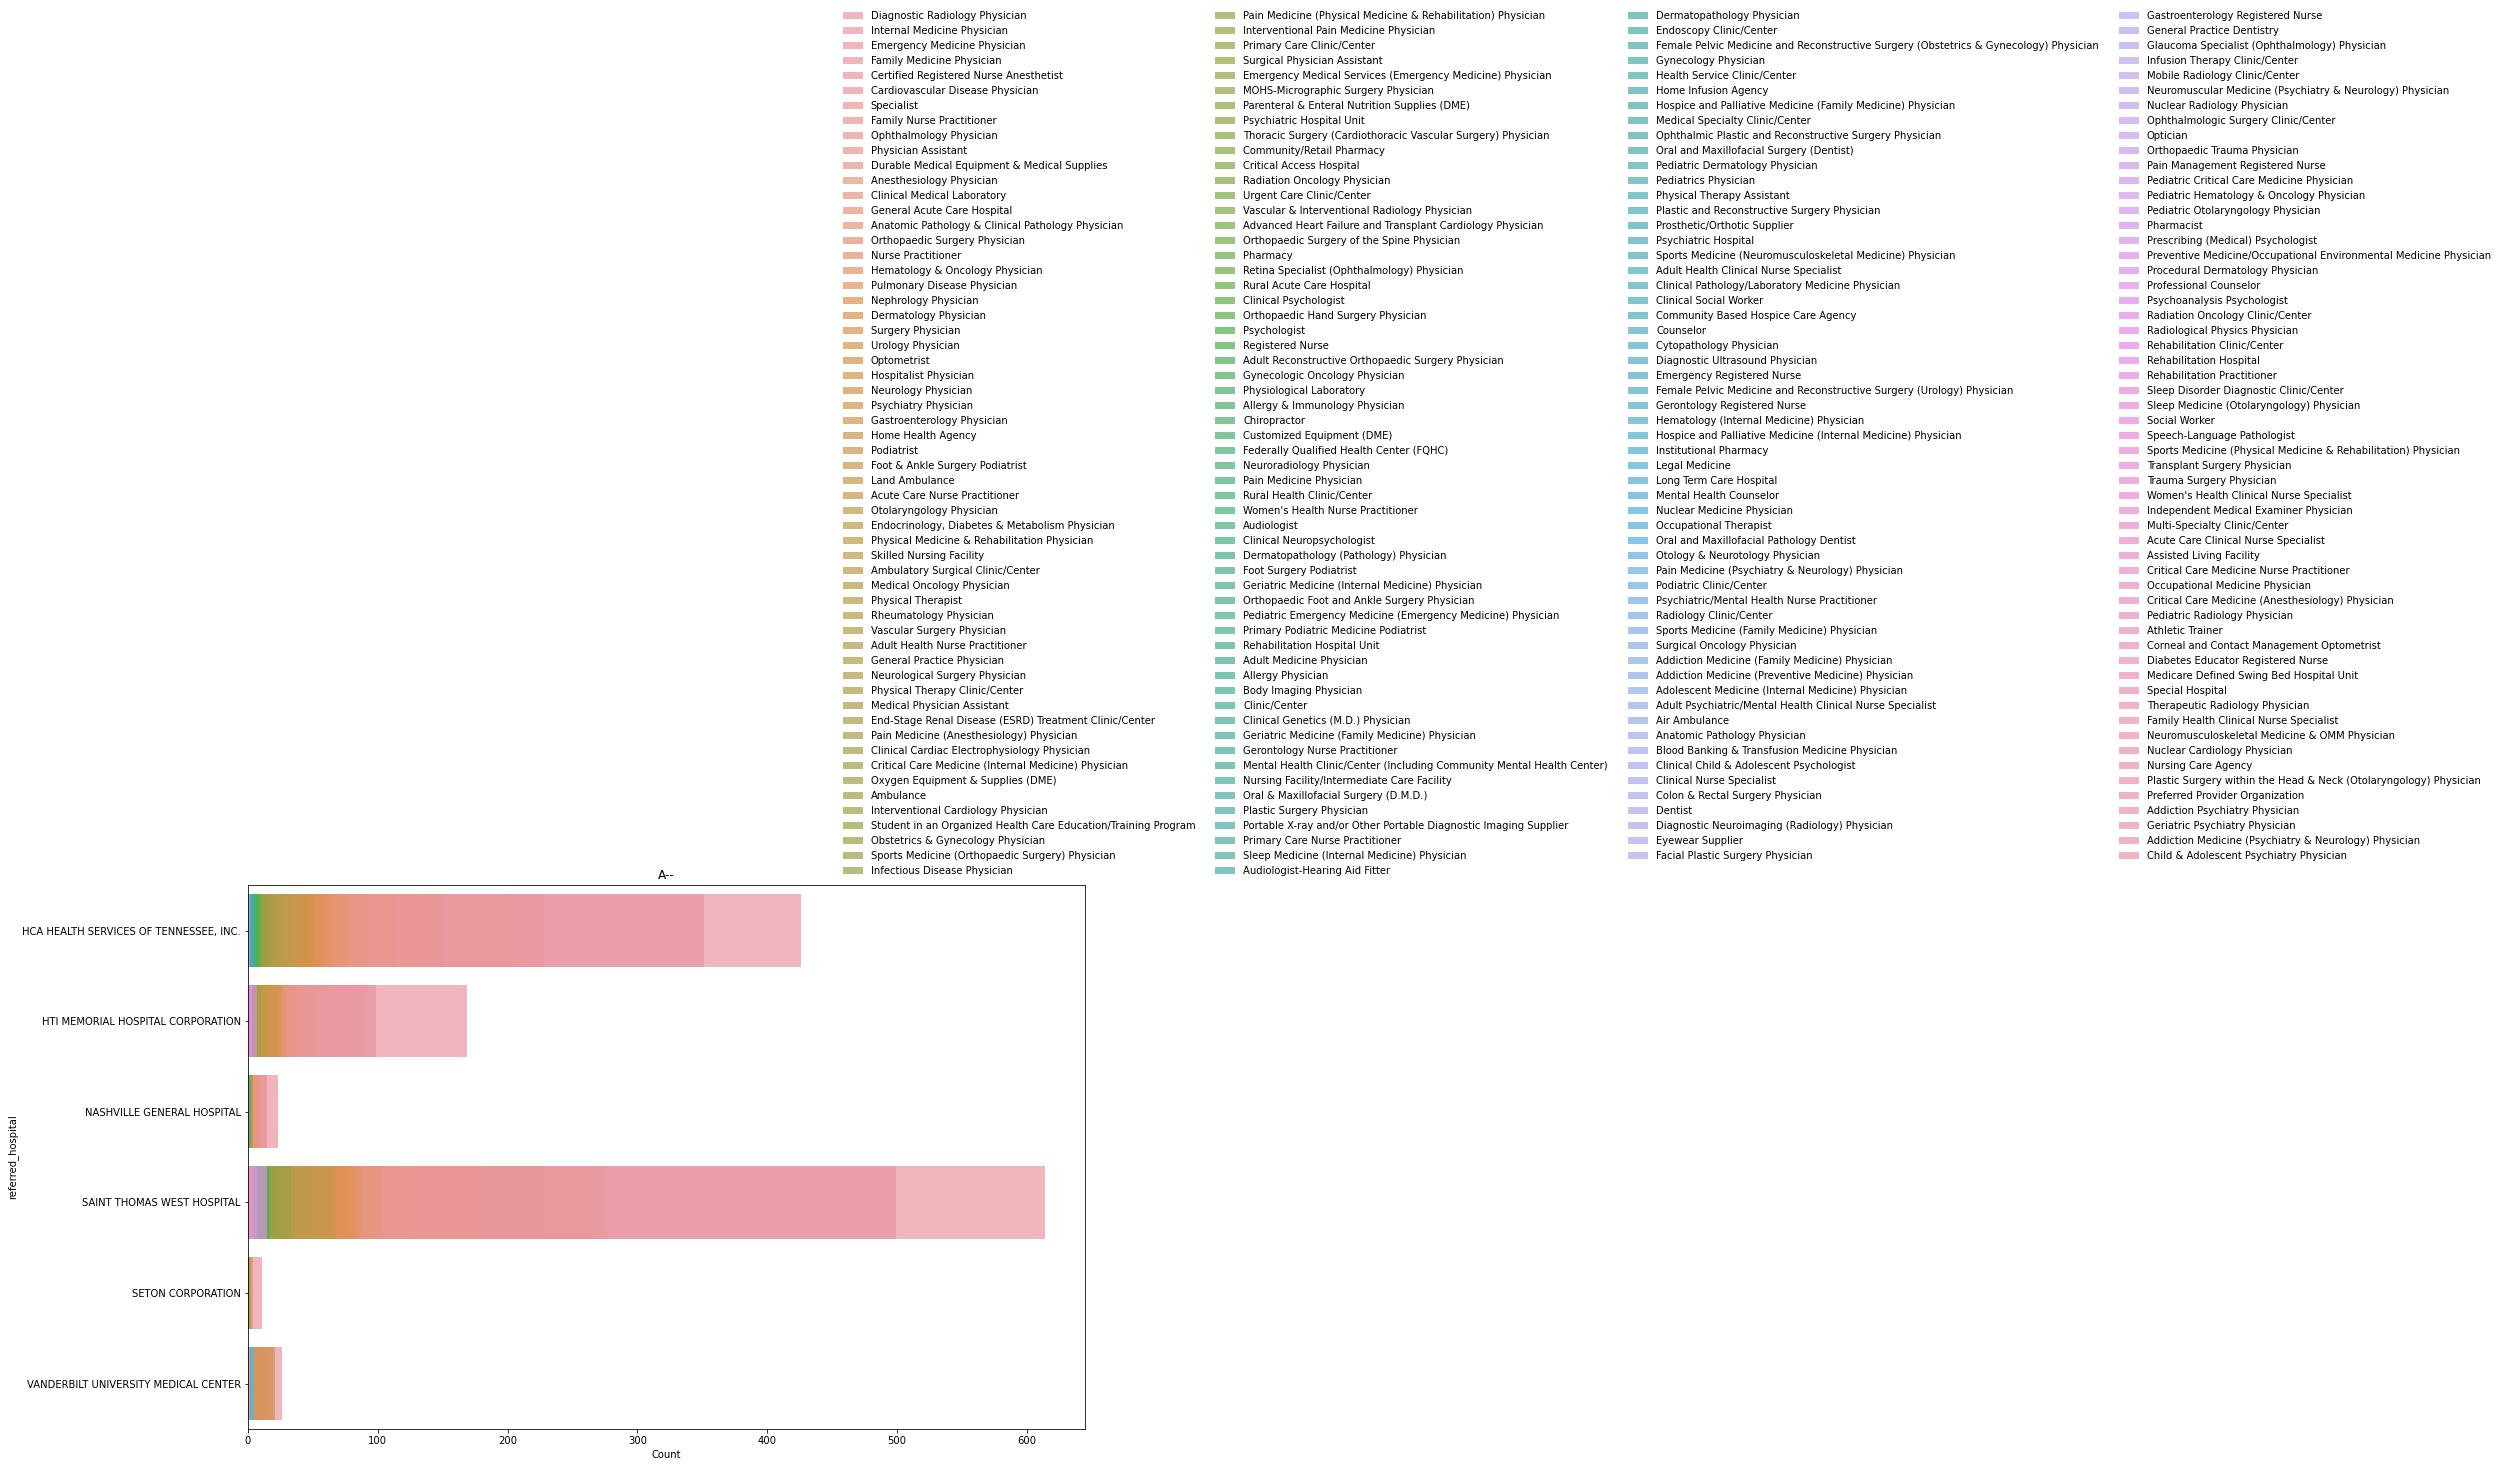

In [21]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(data=table, x = 'Count', y = 'referred_hospital' , hue= 'referring_specialty', ax = ax, dodge=False, alpha=0.7)

plt.legend(bbox_to_anchor=([0.7, 1, 0, 0]), ncol=4, frameon=False)
plt.title('A--')
plt.show()

In [42]:
pct_table = refs_to_nash.groupby('referred_hospital')['referring_specialty'].value_counts() / refs_to_nash.groupby('referred_hospital')['referring_specialty'].count()
pct_table = pct_table.unstack(level =1)
pct_table

referring_specialty,Acute Care Clinical Nurse Specialist,Acute Care Nurse Practitioner,Addiction Medicine (Family Medicine) Physician,Addiction Medicine (Preventive Medicine) Physician,Addiction Medicine (Psychiatry & Neurology) Physician,Addiction Psychiatry Physician,Adolescent Medicine (Internal Medicine) Physician,Adult Health Clinical Nurse Specialist,Adult Health Nurse Practitioner,Adult Medicine Physician,...,Therapeutic Radiology Physician,Thoracic Surgery (Cardiothoracic Vascular Surgery) Physician,Transplant Surgery Physician,Trauma Surgery Physician,Urgent Care Clinic/Center,Urology Physician,Vascular & Interventional Radiology Physician,Vascular Surgery Physician,Women's Health Clinical Nurse Specialist,Women's Health Nurse Practitioner
referred_hospital,,,,,,,,,,,,,,,,,,,,,
"HCA HEALTH SERVICES OF TENNESSEE, INC.",NaN,0.007650,0.000232,0.000232,NaN,NaN,0.000232,0.000464,0.004868,0.000927,...,NaN,0.002550,0.000232,0.000232,0.002318,0.011590,0.002318,0.005331,0.000232,0.001391
HTI MEMORIAL HOSPITAL CORPORATION,0.000699,0.006988,NaN,NaN,NaN,NaN,0.000699,NaN,0.006988,0.001398,...,NaN,0.000699,NaN,0.004892,0.003494,0.009783,0.002096,0.004892,NaN,0.001398
NASHVILLE GENERAL HOSPITAL,NaN,0.005405,NaN,NaN,NaN,NaN,NaN,NaN,0.010811,NaN,...,NaN,NaN,NaN,NaN,NaN,0.010811,NaN,0.005405,NaN,NaN
SAINT THOMAS WEST HOSPITAL,NaN,0.008812,NaN,0.000367,NaN,NaN,0.000367,NaN,0.004406,0.001102,...,0.000367,0.001469,0.000551,0.000184,0.001469,0.012300,0.001836,0.006242,0.000184,0.001285
SETON CORPORATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.024390,0.024390,NaN,NaN,NaN
VANDERBILT UNIVERSITY MEDICAL CENTER,NaN,NaN,NaN,NaN,0.004167,0.008333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.004167,NaN,NaN,NaN,NaN


In [48]:
pct_table.idxmax(axis=1)

referred_hospital
HCA HEALTH SERVICES OF TENNESSEE, INC.    Diagnostic Radiology Physician
HTI MEMORIAL HOSPITAL CORPORATION         Diagnostic Radiology Physician
NASHVILLE GENERAL HOSPITAL                  Emergency Medicine Physician
SAINT THOMAS WEST HOSPITAL                   Internal Medicine Physician
SETON CORPORATION                         Diagnostic Radiology Physician
VANDERBILT UNIVERSITY MEDICAL CENTER      Diagnostic Radiology Physician
dtype: object

In [49]:
pct_table.max(axis = 1)

referred_hospital
HCA HEALTH SERVICES OF TENNESSEE, INC.    0.098748
HTI MEMORIAL HOSPITAL CORPORATION         0.118099
NASHVILLE GENERAL HOSPITAL                0.124324
SAINT THOMAS WEST HOSPITAL                0.112723
SETON CORPORATION                         0.268293
VANDERBILT UNIVERSITY MEDICAL CENTER      0.108333
dtype: float64

In [51]:
pd.DataFrame({'top_specialty_referring_it': pct_table.idxmax(axis=1), 'share_of_referrals':pct_table.max(axis = 1)} )

,top_specialty_referring_it,share_of_referrals
referred_hospital,,
"HCA HEALTH SERVICES OF TENNESSEE, INC.",Diagnostic Radiology Physician,0.098748
HTI MEMORIAL HOSPITAL CORPORATION,Diagnostic Radiology Physician,0.118099
NASHVILLE GENERAL HOSPITAL,Emergency Medicine Physician,0.124324
SAINT THOMAS WEST HOSPITAL,Internal Medicine Physician,0.112723
SETON CORPORATION,Diagnostic Radiology Physician,0.268293
VANDERBILT UNIVERSITY MEDICAL CENTER,Diagnostic Radiology Physician,0.108333


--the number one specialty doing referals for 4/6 nashville hospitals is Diagnostic Radiology, comprising about 10% of all referrals. 
--the number one specialty doing referrals to Nashville General Hospital is Emergency Medicine
--the number one specialty doing referrals to St. Thomas is Internal Medicine. 

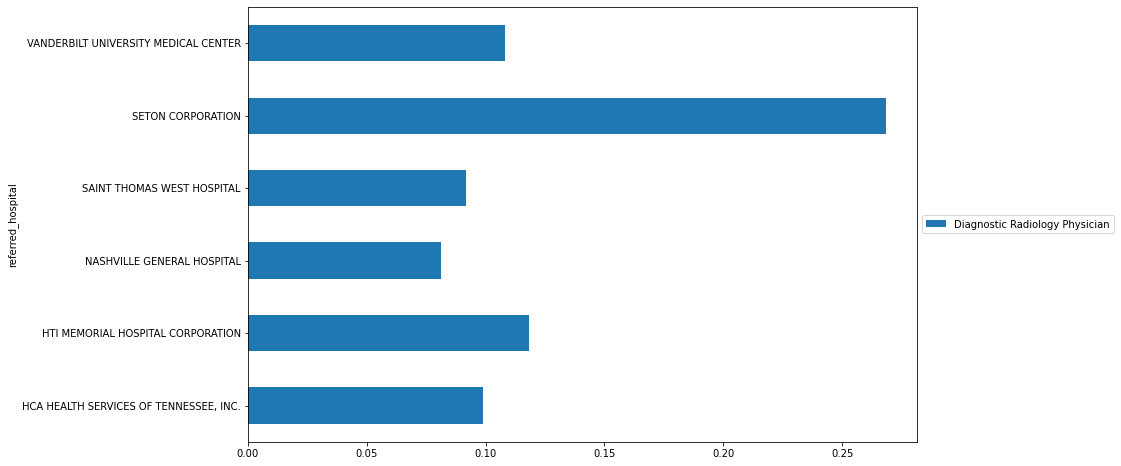

In [52]:
ax = pct_table['Diagnostic Radiology Physician'].plot(kind = 'barh', stacked = True, figsize = (12, 8))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [22]:
table["rank"] = table.groupby("referring_specialty")["Count"].rank(method="dense", ascending = True)
table

,referred_hospital,referring_specialty,Count,rank
0,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Diagnostic Radiology Physician,426,5.0
1,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Internal Medicine Physician,351,5.0
2,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Emergency Medicine Physician,228,5.0
3,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Family Medicine Physician,205,5.0
4,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Certified Registered Nurse Anesthetist,151,4.0
...,...,...,...,...
699,VANDERBILT UNIVERSITY MEDICAL CENTER,Registered Nurse,1,1.0
700,VANDERBILT UNIVERSITY MEDICAL CENTER,Retina Specialist (Ophthalmology) Physician,1,1.0
701,VANDERBILT UNIVERSITY MEDICAL CENTER,Speech-Language Pathologist,1,1.0
702,VANDERBILT UNIVERSITY MEDICAL CENTER,Surgery Physician,1,1.0


In [23]:
table['rank'].unique()

array([5., 4., 6., 3., 2., 1.])

In [24]:
top_referred_hosps_by_spec = table[table['rank'] == 5]
top_referred_hosps_by_spec

,referred_hospital,referring_specialty,Count,rank
0,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Diagnostic Radiology Physician,426,5.0
1,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Internal Medicine Physician,351,5.0
2,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Emergency Medicine Physician,228,5.0
3,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Family Medicine Physician,205,5.0
9,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Physician Assistant,94,5.0
13,"HCA HEALTH SERVICES OF TENNESSEE, INC.",General Acute Care Hospital,77,5.0
17,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Hematology & Oncology Physician,64,5.0
26,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Psychiatry Physician,45,5.0
77,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Clinical Psychologist,8,5.0
79,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Psychologist,8,5.0


In [25]:
top_referred_hosps_by_spec['referred_hospital'].value_counts()

SAINT THOMAS WEST HOSPITAL                20
HCA HEALTH SERVICES OF TENNESSEE, INC.    10
Name: referred_hospital, dtype: int64

In [26]:
table_b = refs_to_nash.groupby('referring_specialty')['referred_hospital'].value_counts()
table_b = pd.DataFrame(table_b)
table_b.columns

Index(['referred_hospital'], dtype='object')

In [27]:
table_b = table_b.rename(columns ={'referred_hospital' :'Count'})
table_b.reset_index(inplace = True)
table_b

,referring_specialty,referred_hospital,Count
0,Acute Care Clinical Nurse Specialist,HTI MEMORIAL HOSPITAL CORPORATION,1
1,Acute Care Nurse Practitioner,SAINT THOMAS WEST HOSPITAL,48
2,Acute Care Nurse Practitioner,"HCA HEALTH SERVICES OF TENNESSEE, INC.",33
3,Acute Care Nurse Practitioner,HTI MEMORIAL HOSPITAL CORPORATION,10
4,Acute Care Nurse Practitioner,NASHVILLE GENERAL HOSPITAL,1
...,...,...,...
699,Women's Health Clinical Nurse Specialist,"HCA HEALTH SERVICES OF TENNESSEE, INC.",1
700,Women's Health Clinical Nurse Specialist,SAINT THOMAS WEST HOSPITAL,1
701,Women's Health Nurse Practitioner,SAINT THOMAS WEST HOSPITAL,7
702,Women's Health Nurse Practitioner,"HCA HEALTH SERVICES OF TENNESSEE, INC.",6


In [28]:
table_b["rank"] = table_b.groupby("referring_specialty")["Count"].rank(method="dense", ascending = True)
table_b

,referring_specialty,referred_hospital,Count,rank
0,Acute Care Clinical Nurse Specialist,HTI MEMORIAL HOSPITAL CORPORATION,1,1.0
1,Acute Care Nurse Practitioner,SAINT THOMAS WEST HOSPITAL,48,4.0
2,Acute Care Nurse Practitioner,"HCA HEALTH SERVICES OF TENNESSEE, INC.",33,3.0
3,Acute Care Nurse Practitioner,HTI MEMORIAL HOSPITAL CORPORATION,10,2.0
4,Acute Care Nurse Practitioner,NASHVILLE GENERAL HOSPITAL,1,1.0
...,...,...,...,...
699,Women's Health Clinical Nurse Specialist,"HCA HEALTH SERVICES OF TENNESSEE, INC.",1,1.0
700,Women's Health Clinical Nurse Specialist,SAINT THOMAS WEST HOSPITAL,1,1.0
701,Women's Health Nurse Practitioner,SAINT THOMAS WEST HOSPITAL,7,3.0
702,Women's Health Nurse Practitioner,"HCA HEALTH SERVICES OF TENNESSEE, INC.",6,2.0


In [29]:
top_ref_hosps_by_spec_b = table_b[table_b['rank'] == 5]
top_ref_hosps_by_spec_b

,referring_specialty,referred_hospital,Count,rank
37,Ambulance,SAINT THOMAS WEST HOSPITAL,21,5.0
47,Anatomic Pathology & Clinical Pathology Physician,SAINT THOMAS WEST HOSPITAL,70,5.0
56,Anesthesiology Physician,SAINT THOMAS WEST HOSPITAL,100,5.0
74,Cardiovascular Disease Physician,SAINT THOMAS WEST HOSPITAL,228,5.0
79,Certified Registered Nurse Anesthetist,SAINT THOMAS WEST HOSPITAL,193,5.0
103,Clinical Medical Laboratory,SAINT THOMAS WEST HOSPITAL,104,5.0
118,Clinical Psychologist,"HCA HEALTH SERVICES OF TENNESSEE, INC.",8,5.0
153,Dermatology Physician,SAINT THOMAS WEST HOSPITAL,64,5.0
169,Diagnostic Radiology Physician,"HCA HEALTH SERVICES OF TENNESSEE, INC.",426,5.0
176,Durable Medical Equipment & Medical Supplies,SAINT THOMAS WEST HOSPITAL,98,5.0


In [30]:
top_ref_hosps_by_spec_b['referred_hospital'].value_counts()

SAINT THOMAS WEST HOSPITAL                20
HCA HEALTH SERVICES OF TENNESSEE, INC.    10
Name: referred_hospital, dtype: int64

--Saint Thomas West Hospital is the top referred to hospital for 67% of specialties, and HCA is the second top referred to hospital with 33% of specialties.
--From specialties, the top number of referrals is by Diagnosti Radiology Physician to HCA.